In [1]:
import os, sys
%matplotlib inline
import matplotlib.pyplot as plt
import math

ROOT_DIR = '/home/wangwenzhe/tf-faster-rcnn-rddc'
ANALYSIS_DIR = os.path.join(ROOT_DIR, 'analysis')

file_name = 'window_file_voc2007_trainval.txt'

# load the annotations
bboxs = []
with open(os.path.join(ANALYSIS_DIR, file_name)) as f:
    im_name = f.readline().strip()
    while(im_name):
        obj_num = int(f.readline().strip())
        for i in range(obj_num):
            bboxs.append(f.readline().strip().split(' '))
        im_name = f.readline().strip()

class number: [2244, 3009, 576, 512, 2045, 317, 651, 3015]


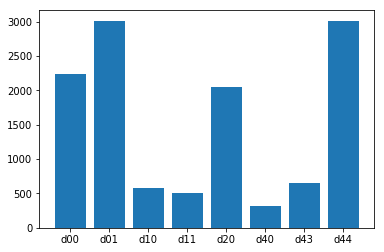

In [2]:
# numbers of different classes 
CLASSES = ('d00', 'd01', 'd10', 'd11', 'd20', 'd40', 'd43', 'd44')

class_num = [0 for i in range(8)]
for b in bboxs:
    class_num[int(b[0]) - 1] += 1
print('class number: {}'.format(class_num))
plt.bar(CLASSES, class_num, 0.8)
plt.show()

Numbers of different aspect ratios (all targets): [4, 5, 9, 11, 35, 61, 119, 219, 538, 1915, 5781, 1644, 535, 387, 291, 227, 138, 105, 68, 65, 212]


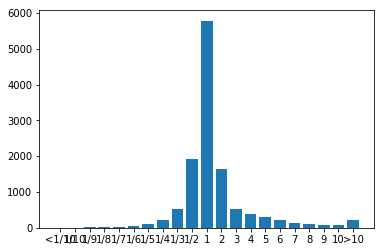

Numbers of different aspect ratios (class d00): [0, 0, 0, 0, 3, 3, 9, 24, 85, 612, 1329, 165, 12, 2, 0, 0, 0, 0, 0, 0, 0]
Average value of aspect ratios: 0.8828301643670343


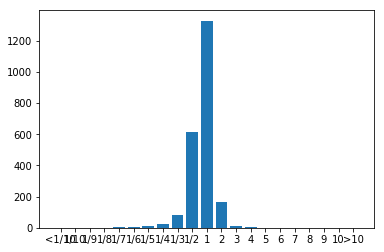

Numbers of different aspect ratios (class d01): [4, 5, 9, 11, 27, 50, 98, 174, 388, 873, 1240, 114, 9, 1, 4, 0, 0, 0, 1, 0, 1]
Average value of aspect ratios: 0.7072487500360054


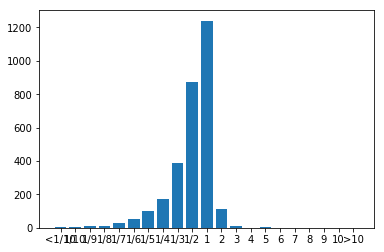

Numbers of different aspect ratios (class d10): [0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 9, 45, 118, 114, 106, 67, 38, 24, 14, 13, 25]
Average value of aspect ratios: 4.969124310161453


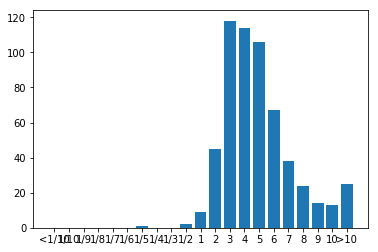

Numbers of different aspect ratios (class d11): [0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 21, 49, 45, 67, 57, 47, 37, 35, 144]
Average value of aspect ratios: 8.660044031759783


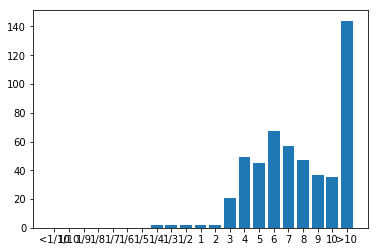

Numbers of different aspect ratios (class d20): [0, 0, 0, 0, 0, 0, 0, 0, 3, 88, 904, 792, 183, 51, 13, 6, 2, 1, 1, 1, 0]
Average value of aspect ratios: 1.6850616450890301


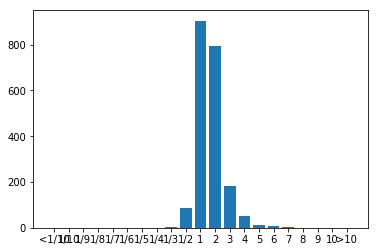

Numbers of different aspect ratios (class d40): [0, 0, 0, 0, 0, 0, 0, 0, 3, 21, 156, 102, 15, 8, 3, 3, 1, 1, 1, 2, 1]
Average value of aspect ratios: 1.729776451512715


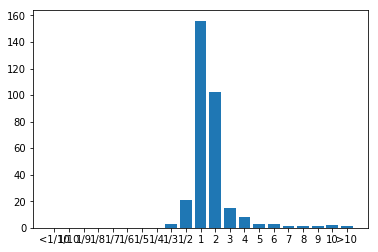

Numbers of different aspect ratios (class d43): [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 18, 91, 139, 147, 107, 70, 29, 23, 7, 9, 9]
Average value of aspect ratios: 4.311781179257754


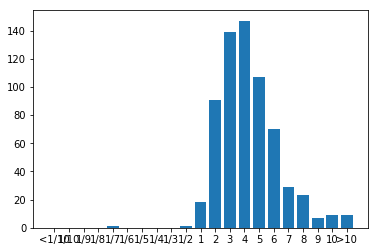

Numbers of different aspect ratios (class d44): [0, 0, 0, 0, 4, 8, 11, 19, 57, 316, 2123, 333, 38, 15, 13, 14, 11, 9, 7, 5, 32]
Average value of aspect ratios: 1.3509999433593833


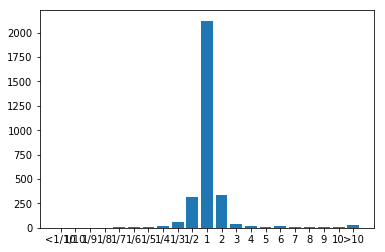

In [3]:
# indexs of aspect ratios
ratio_index = ['<1/10']
ratio_index.extend([('1/' + str(r)) for r in range(10, 1, -1)])
ratio_index.extend([str(r) for r in range(1, 11)])
ratio_index.append('>10')

# aspect ratios of all targets
anchor_ratios_num = [0 for i in range(21)]
for b in bboxs:
    aspect_ratio = (int(b[3]) - int(b[1])) / (int(b[4]) - int(b[2]))
    if aspect_ratio >= 1 and aspect_ratio < 10.5:
        anchor_ratios_num[round(aspect_ratio) + 9] += 1
    elif aspect_ratio >= 10.5:
        anchor_ratios_num[20] += 1
    else:
        aspect_ratio = 1 / aspect_ratio
        if aspect_ratio >= 1 and aspect_ratio < 10.5:
            anchor_ratios_num[11 - round(aspect_ratio)] += 1
        elif aspect_ratio >= 10.5:
            anchor_ratios_num[0] += 1
print('Numbers of different aspect ratios (all targets): {}'.format(anchor_ratios_num))
plt.bar(ratio_index, anchor_ratios_num, 0.8)
plt.show()

# aspect ratios of targets (each class)
for i in range(8):
    anchor_ratios_num = [0 for i in range(21)]
    ratios = []
    for b in bboxs:
        if int(b[0]) == i + 1:
            aspect_ratio = (int(b[3]) - int(b[1])) / (int(b[4]) - int(b[2]))
            ratios.append(aspect_ratio)
            if aspect_ratio >= 1 and aspect_ratio < 10.5:
                anchor_ratios_num[round(aspect_ratio) + 9] += 1
            elif aspect_ratio >= 10.5:
                anchor_ratios_num[20] += 1
            else:
                aspect_ratio = 1 / aspect_ratio
                if aspect_ratio >= 1 and aspect_ratio < 10.5:
                    anchor_ratios_num[11 - round(aspect_ratio)] += 1
                elif aspect_ratio >= 10.5:
                    anchor_ratios_num[0] += 1
    print('Numbers of different aspect ratios (class {}): {}'.format(CLASSES[i], anchor_ratios_num))
    print('Average value of aspect ratios: {}'.format(sum(ratios) / len(ratios)))
    plt.bar(ratio_index, anchor_ratios_num, 0.8)
    plt.show()

Numbers of different sizes (all targets): [9, 1188, 3050, 3053, 2300, 1437, 758, 455, 102, 15, 2, 0, 0]


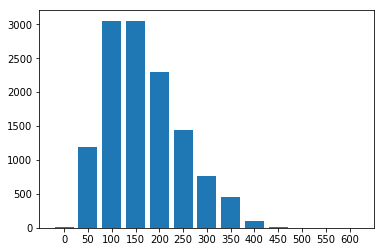

Numbers of different sizes (class d00): [0, 347, 814, 649, 287, 103, 31, 10, 1, 1, 1, 0, 0]
Average value of object sizes: 130.8116020062335


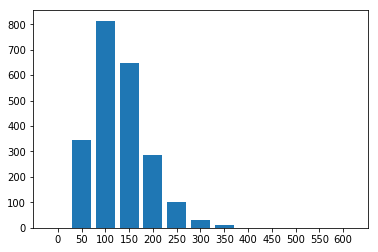

Numbers of different sizes (class d01): [1, 354, 845, 848, 588, 301, 59, 13, 0, 0, 0, 0, 0]
Average value of object sizes: 147.88014906475107


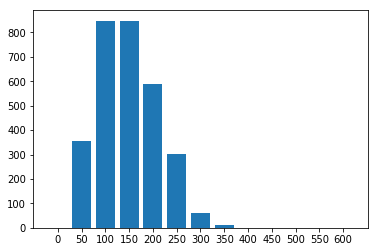

Numbers of different sizes (class d10): [0, 72, 238, 156, 74, 22, 8, 5, 1, 0, 0, 0, 0]
Average value of object sizes: 130.4193699022399


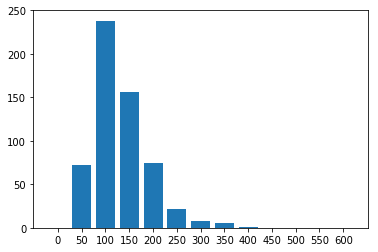

Numbers of different sizes (class d11): [0, 63, 252, 125, 44, 19, 6, 3, 0, 0, 0, 0, 0]
Average value of object sizes: 124.61552994901552


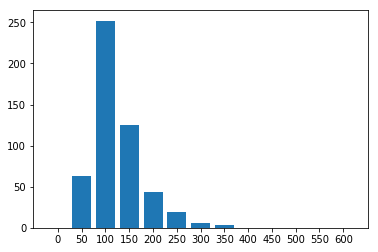

Numbers of different sizes (class d20): [0, 21, 184, 307, 383, 371, 386, 315, 67, 10, 1, 0, 0]
Average value of object sizes: 240.57428660671422


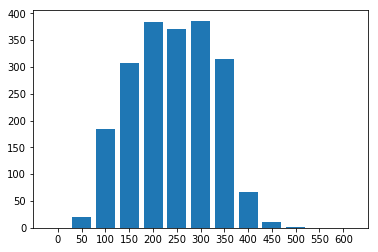

Numbers of different sizes (class d40): [2, 73, 72, 54, 52, 35, 17, 11, 1, 0, 0, 0, 0]
Average value of object sizes: 150.38541025050444


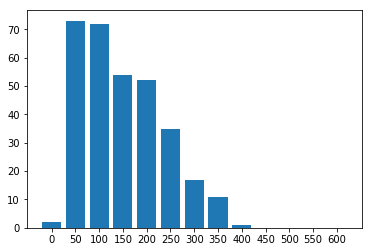

Numbers of different sizes (class d43): [0, 14, 58, 86, 133, 147, 108, 77, 24, 4, 0, 0, 0]
Average value of object sizes: 235.92882968254017


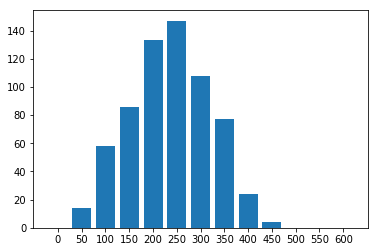

Numbers of different sizes (class d44): [6, 244, 587, 828, 739, 439, 143, 21, 8, 0, 0, 0, 0]
Average value of object sizes: 168.23291821392945


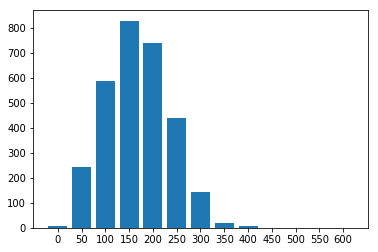

In [4]:
# sizes of all targets
object_size_num = [0 for i in range(13)]
for b in bboxs:
    object_size = math.sqrt((int(b[3]) - int(b[1])) * (int(b[4]) - int(b[2])))
    object_size_num[round(object_size / 50)] += 1
print('Numbers of different sizes (all targets): {}'.format(object_size_num))
plt.bar(list(map(str, range(0, 601, 50))), object_size_num, 0.8)
plt.show()

# sizes of targets (each class)
for i in range(8):
    object_size_num = [0 for i in range(13)]
    sizes = []
    for b in bboxs:
        if int(b[0]) == i + 1:
            object_size = math.sqrt((int(b[3]) - int(b[1])) * (int(b[4]) - int(b[2])))
            sizes.append(object_size)
            object_size_num[round(object_size / 50)] += 1
    print('Numbers of different sizes (class {}): {}'.format(CLASSES[i], object_size_num))
    print('Average value of object sizes: {}'.format(sum(sizes) / len(sizes)))
    plt.bar(list(map(str, range(0, 601, 50))), object_size_num, 0.8)
    plt.show()